In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

In [2]:
### searborn param initializations
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [3]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_PATH + 'mlbootcamp5_train.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# 1.1 Basic observations

### Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

In [5]:
two = df[df['gender'] == 2]['height'].median()
one = df[df['gender'] == 1]['height'].median()
print(one, two) # answer is 45530 women and 24470 men

161.0 170.0


### Question 1.2. (1 point). Who more often report consuming alcohol – men or women?

In [6]:
# assuming 0 is false and 1 is true
df.groupby(['gender'])['alco'].sum()
# Since 2603 > 1161, then men often reports alcohol consumption.

gender
1    1161
2    2603
Name: alco, dtype: int64

In [7]:
men = df[df['gender'] == 2]['smoke'].mean()
women = df[df['gender'] == 1]['smoke'].mean()
print((men-women)*100)

20.102390309976737


In [8]:
smokers = df[df['smoke'] == 1]['age'].median()/365
non_smokers = df[df['smoke'] == 0]['age'].median()/365
print(abs(smokers-non_smokers)*12)

19.62739726027391


In [8]:
df['age_years'] = (df['age']/365).astype("int64")
new_df = df[(df['age_years'] >= 60) & (df['age_years'] <= 64)]
d = {1: "4 mmol/l", 2: "5-7 mmol/l", 3:"8 mmol/l"}
new_df['cholesterol'] = new_df['cholesterol'].map(d)
new_df

C:\Users\Justin Clyde\AppData\Local\Temp\ipykernel_640\1206309472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cholesterol'] = new_df['cholesterol'].map(d)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
5,8,21914,1,151,67.0,120,80,5-7 mmol/l,2,0,0,0,0,60
6,9,22113,1,157,93.0,130,80,8 mmol/l,1,0,0,1,0,60
7,12,22584,2,178,95.0,130,90,8 mmol/l,3,0,0,1,1,61
10,15,22530,1,169,80.0,120,80,4 mmol/l,1,0,0,1,0,61
22,32,23046,1,158,90.0,145,85,5-7 mmol/l,2,0,0,1,1,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69970,99958,22572,2,173,103.0,140,80,8 mmol/l,1,1,1,0,1,61
69973,99961,22142,2,175,72.0,130,80,4 mmol/l,1,0,0,1,0,60
69979,99969,22423,1,163,74.0,160,100,5-7 mmol/l,2,0,0,1,1,61
69988,99981,21978,1,160,59.0,110,70,4 mmol/l,1,0,0,1,0,60


In [18]:
# total = new_df.groupby('gender').cardio.count()
# total
sm = new_df[(new_df['smoke'] == 1) & (new_df['cardio'] == 1)]['smoke'].count()
tsm = new_df[(new_df['smoke'] == 1)]['smoke'].count()
nsm = new_df[(new_df['smoke'] == 0) & (new_df['cardio'] == 1)]['smoke'].count()
tnsm = new_df[(new_df['smoke'] == 0)]['smoke'].count()
print(sm/tsm, nsm/tnsm)

0.6442307692307693 0.672032359253756


In [19]:
df['bmi'] = df['weight']/(df['height']/100)**2
med_bmi = df['bmi'].median()
med_bmi

26.374068120774975

In [21]:
wom_bmi = df[df['gender'] == 1]['bmi'].mean()
men_bmi = df[df['gender'] == 2]['bmi'].mean()
print(wom_bmi > men_bmi)

True


In [22]:
hea_med = df[df['cardio'] == 0]['bmi'].median()
wea_med = df[df['cardio'] == 1]['bmi'].median()
print(hea_med > wea_med)

False


In [23]:
wom_bmi = df[(df['gender'] == 1) & (df['cardio'] == 0) & (df['alco'] == 0)]['bmi'].mean()
men_bmi = df[(df['gender'] == 2) & (df['cardio'] == 0) & (df['alco'] == 0)]['bmi'].mean()
print(wom_bmi, men_bmi)

26.845406594131507 25.87263807546017


In [27]:
df.shape

(70000, 13)

In [5]:
### cleaning data
df = df[(df['ap_hi'] >= df['ap_lo']) &
        (df['height'] >= df['height'].quantile(0.025)) &
       (df['height'] <= df['height'].quantile(0.975)) &
       (df['weight'] >= df['weight'].quantile(0.025)) &
       (df['weight'] <= df['weight'].quantile(0.975))]
df.shape

(63259, 13)

In [29]:
63259/70000

0.9037

In [37]:
print(df['cardio'].corr(df['cholesterol']))
print(df['height'].corr(df['smoke']))
print(df['smoke'].corr(df['alco'])) # 3 yung sagot based sa heatmap
print(df['height'].corr(df['weight']))

0.21908990540169274
0.1878295752607172
0.34120042542324314
0.25150286480849954


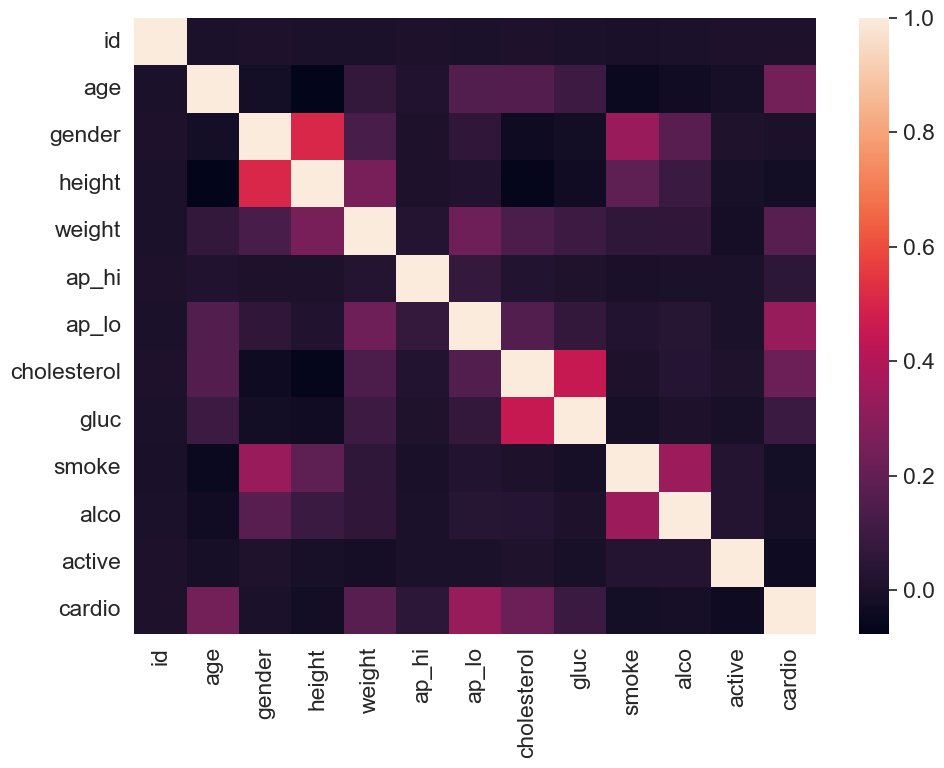

In [31]:
sns.heatmap(df.corr())
plt.show()

<AxesSubplot: ylabel='height'>

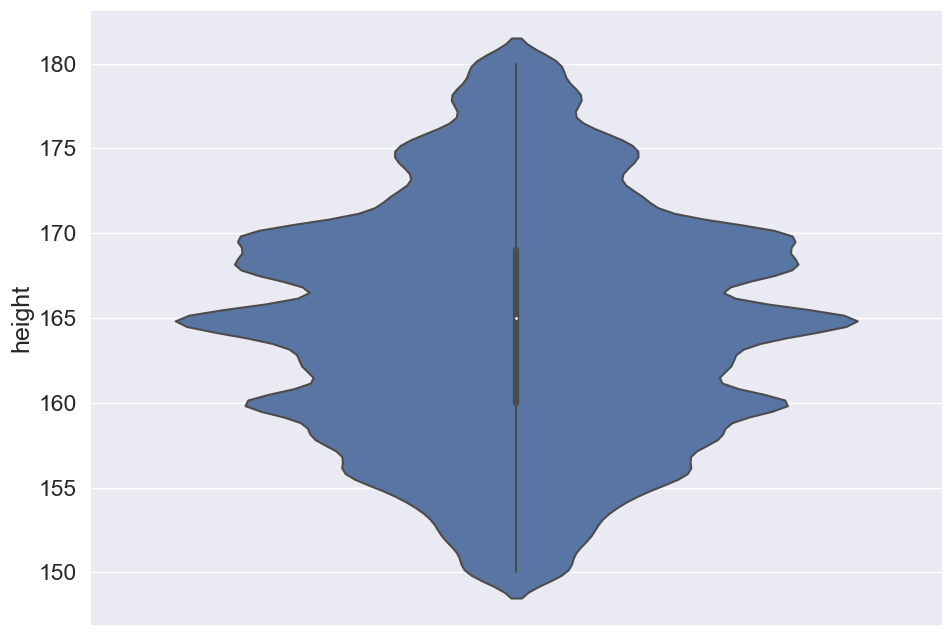

In [39]:
sns.violinplot(data=df, y='height', hue='gender', scale='count')

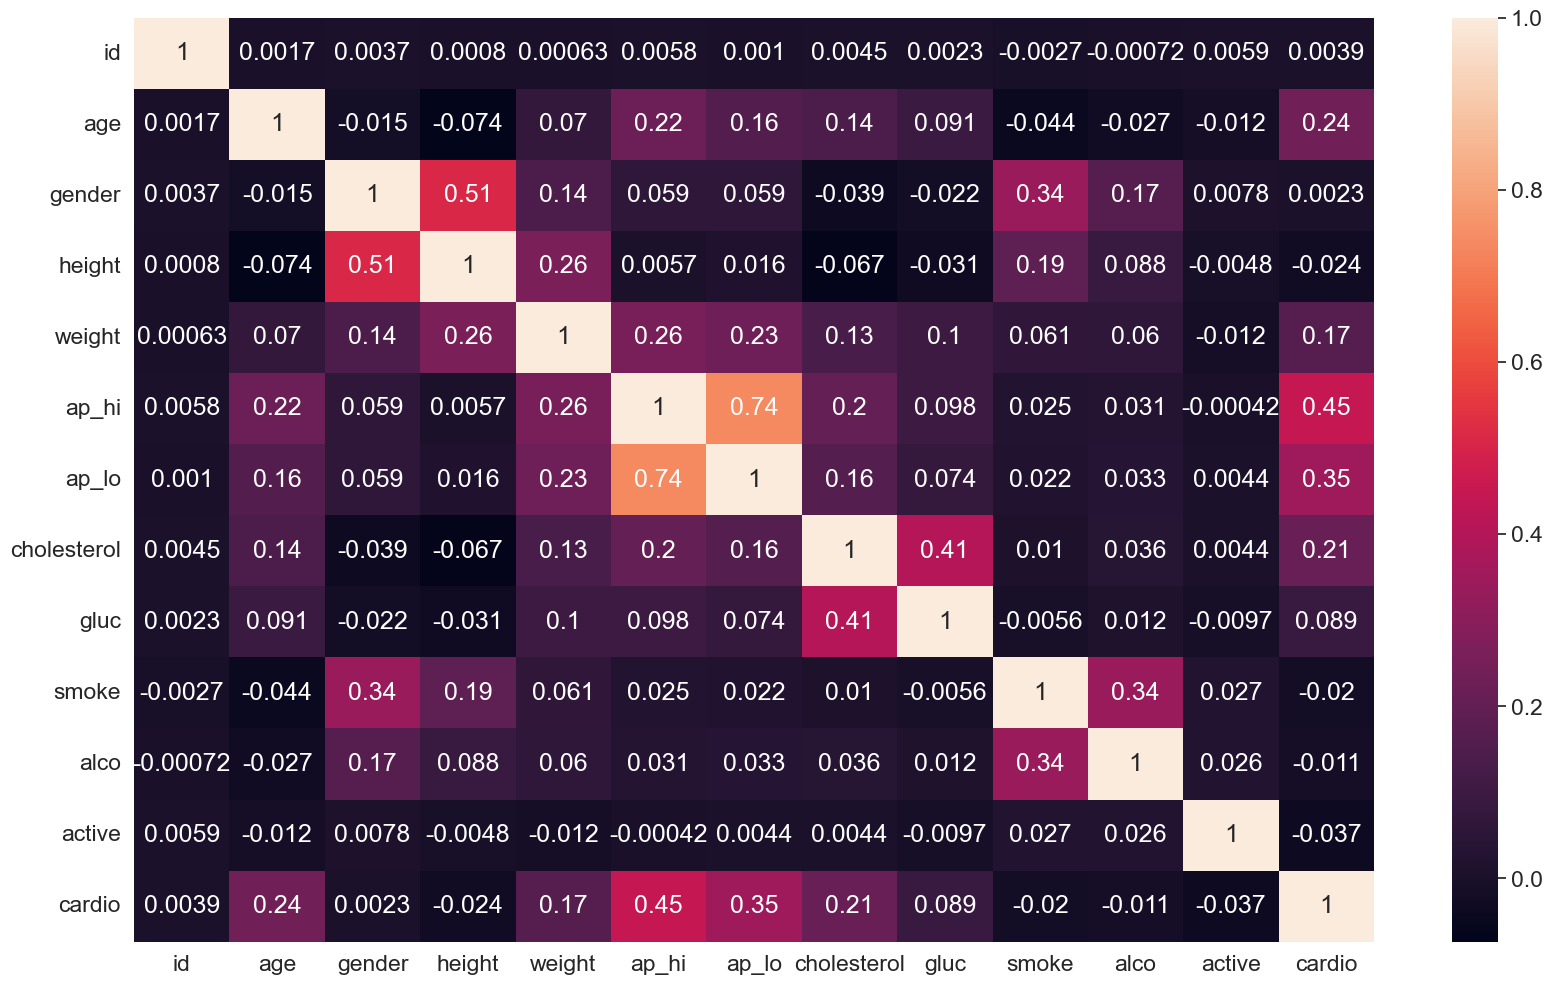

In [50]:
plt.rcParams['figure.figsize'] = (20,12)
sns.heatmap(df.corr(method='spearman'), annot=True); # ap_hi and ap_lo

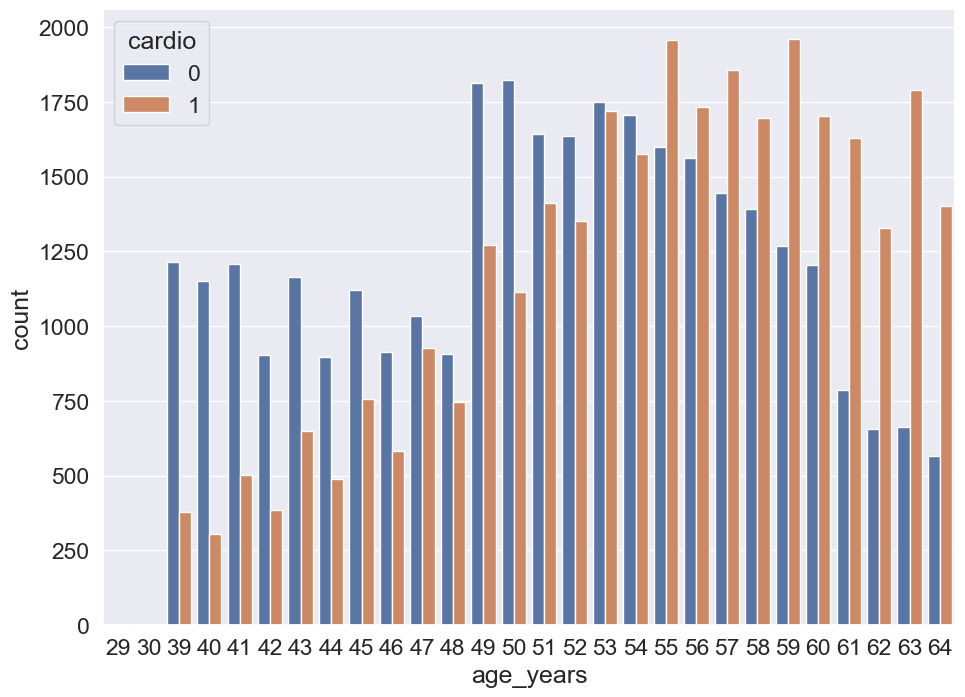

In [9]:
# sns.countplot(x="age_years",hue="cardio",data=df)
sns.countplot(x="age_years", hue="cardio", data=df);